##### About this notebook:

In [1]:
#-----------------------------------------------------------------------------------------------------------------------------
# Author:             Erick Rico Esparza
# Dates:              Sep 12 - 17, 2025
# Description:        This notebook further explores datasets from HK and Mexico City, aiming to prepare the Week 2 presentation.
#-----------------------------------------------------------------------------------------------------------------------------

# Week 2

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Data Exploration & Cleaning

### Hong Kong

In [4]:
df_hk_2012_2014 = pd.read_csv('air_daily_hk_2012-2014.csv', skiprows=11, on_bad_lines='skip')
df_hk_2015_2024 = pd.read_csv('air_daily_hk_2015-2024.csv', skiprows=11, on_bad_lines='skip')

In [5]:
df_hk_2012_2014.head()

,DATE,STATION,SO2,NO2,RSP,O3,FSP
0,01-01-2012,CENTRAL/WESTERN,13,65,75,38,59
1,01-01-2012,EASTERN,3,61,48,48,37
2,01-01-2012,KWAI CHUNG,29,81,61,31,48
3,01-01-2012,KWUN TONG,13,61,50,50,37
4,01-01-2012,SHAM SHUI PO,16,79,55,32,42


In [6]:
df_hk_2015_2024.head()

,DATE,STATION,SO2,NO2,RSP,O3,FSP
0,01-01-2015,CENTRAL/WESTERN,14,48,N.A.,53,N.A.
1,01-01-2015,EASTERN,13,62,65,66,44
2,01-01-2015,KWAI CHUNG,22,75,52,61,37
3,01-01-2015,KWUN TONG,16,41,76,94,46
4,01-01-2015,SHAM SHUI PO,14,71,60,69,43


In [7]:
# Concatenate the two dataframes
df_hk = pd.concat([df_hk_2012_2014, df_hk_2015_2024], ignore_index=True)

# Drop rows where any column has the exact value 'N.A.'
df_hk = df_hk[~df_hk.isin(['N.A.']).any(axis=1)]

# Rename columns: RSP to PM10, FSP to PM2.5
df_hk = df_hk.rename(columns={'RSP': 'PM10', 'FSP': 'PM2.5'})

# Convert SO2, NO2, O3, PM10, PM2.5 to integer (after dropping N.A.)
for col in ['SO2', 'NO2', 'O3', 'PM10', 'PM2.5']:
    df_hk[col] = pd.to_numeric(df_hk[col], errors='coerce').astype('Int64')

# Show the result
print(df_hk.head())
print(df_hk.info())
print(df_hk['STATION'].unique())
print(df_hk.isna().any())

         DATE          STATION  SO2  NO2  PM10  O3  PM2.5
0  01-01-2012  CENTRAL/WESTERN   13   65    75  38     59
1  01-01-2012          EASTERN    3   61    48  48     37
2  01-01-2012       KWAI CHUNG   29   81    61  31     48
3  01-01-2012        KWUN TONG   13   61    50  50     37
4  01-01-2012     SHAM SHUI PO   16   79    55  32     42
<class 'pandas.core.frame.DataFrame'>
Index: 50022 entries, 0 to 52176
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     50022 non-null  object
 1   STATION  50022 non-null  object
 2   SO2      50022 non-null  Int64 
 3   NO2      50022 non-null  Int64 
 4   PM10     50022 non-null  Int64 
 5   O3       50022 non-null  Int64 
 6   PM2.5    50022 non-null  Int64 
dtypes: Int64(5), object(2)
memory usage: 3.3+ MB
None
DATE       False
STATION    False
SO2        False
NO2        False
PM10       False
O3         False
PM2.5      False
dtype: bool


In [8]:
# Convert DATE to datetime
df_hk['DATE'] = pd.to_datetime(df_hk['DATE'], dayfirst=True, errors='coerce')

In [9]:
df_hk.isna().any()

DATE       False
STATION    False
SO2        False
NO2        False
PM10       False
O3         False
PM2.5      False
dtype: bool

In [ ]:
df_hk.to_csv("cleaned_hk_air_2012-2024.csv", index=False)

### Mexico City

#### Stations: AJM, CAM, FAR, HGM

In [11]:
df_mc_ajm_cam_far_hgm_2012 = pd.read_csv("aire_cdmx_2012_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2013 = pd.read_csv("aire_cdmx_2013_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2014 = pd.read_csv("aire_cdmx_2014_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2015 = pd.read_csv("aire_cdmx_2015_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2016 = pd.read_csv("aire_cdmx_2016_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2017 = pd.read_csv("aire_cdmx_2017_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2018 = pd.read_csv("aire_cdmx_2018_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2019 = pd.read_csv("aire_cdmx_2019_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2020 = pd.read_csv("aire_cdmx_2020_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2021 = pd.read_csv("aire_cdmx_2021_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2022 = pd.read_csv("aire_cdmx_2022_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2023 = pd.read_csv("aire_cdmx_2023_ajm_cam_far_hgm.csv", on_bad_lines='skip')
df_mc_ajm_cam_far_hgm_2024 = pd.read_csv("aire_cdmx_2024_ajm_cam_far_hgm.csv", on_bad_lines='skip')

In [12]:
print(df_mc_ajm_cam_far_hgm_2012.head())
print(df_mc_ajm_cam_far_hgm_2013.head())
print(df_mc_ajm_cam_far_hgm_2014.head())
print(df_mc_ajm_cam_far_hgm_2015.head())
print(df_mc_ajm_cam_far_hgm_2016.head())
print(df_mc_ajm_cam_far_hgm_2017.head())
print(df_mc_ajm_cam_far_hgm_2018.head())
print(df_mc_ajm_cam_far_hgm_2019.head())
print(df_mc_ajm_cam_far_hgm_2020.head())
print(df_mc_ajm_cam_far_hgm_2021.head())
print(df_mc_ajm_cam_far_hgm_2022.head())
print(df_mc_ajm_cam_far_hgm_2023.head())
print(df_mc_ajm_cam_far_hgm_2024.head())

         DATE       STATION  NO2  O3  PM10  PM2.5  SO2
0  01/01/2012  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
1  02/01/2012  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
2  03/01/2012  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
3  04/01/2012  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
4  05/01/2012  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
         DATE       STATION  NO2  O3  PM10  PM2.5  SO2
0  01/01/2013  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
1  02/01/2013  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
2  03/01/2013  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
3  04/01/2013  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
4  05/01/2013  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
         DATE       STATION  NO2  O3  PM10  PM2.5  SO2
0  01/01/2014  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
1  02/01/2014  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
2  03/01/2014  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
3  04/01/2014  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
4  05/01/2014  AJUSCO MEDIO  NaN NaN   NaN    NaN  NaN
         D

In [13]:
print(df_mc_ajm_cam_far_hgm_2012.tail())
print(df_mc_ajm_cam_far_hgm_2013.tail())
print(df_mc_ajm_cam_far_hgm_2014.tail())
print(df_mc_ajm_cam_far_hgm_2015.tail())
print(df_mc_ajm_cam_far_hgm_2016.tail())
print(df_mc_ajm_cam_far_hgm_2017.tail())
print(df_mc_ajm_cam_far_hgm_2018.tail())
print(df_mc_ajm_cam_far_hgm_2019.tail())
print(df_mc_ajm_cam_far_hgm_2020.tail())
print(df_mc_ajm_cam_far_hgm_2021.tail())
print(df_mc_ajm_cam_far_hgm_2022.tail())
print(df_mc_ajm_cam_far_hgm_2023.tail())
print(df_mc_ajm_cam_far_hgm_2024.tail())

            DATE                     STATION   NO2    O3  PM10  PM2.5  SO2
1459  27/12/2012  HOSPITAL GENERAL DE MEXICO 39.00 20.00 61.00  29.00 2.00
1460  28/12/2012  HOSPITAL GENERAL DE MEXICO 42.00 16.00 55.00  23.00 2.00
1461  29/12/2012  HOSPITAL GENERAL DE MEXICO 43.00 22.00 94.00  34.00 5.00
1462  30/12/2012  HOSPITAL GENERAL DE MEXICO 29.00 20.00 45.00  24.00 5.00
1463  31/12/2012  HOSPITAL GENERAL DE MEXICO 24.00 16.00 31.00  16.00 2.00
            DATE                     STATION   NO2    O3  PM10  PM2.5   SO2
1455  27/12/2013  HOSPITAL GENERAL DE MEXICO 35.00  4.00 49.00  31.00  4.00
1456  28/12/2013  HOSPITAL GENERAL DE MEXICO 26.00 10.00 34.00  21.00  6.00
1457  29/12/2013  HOSPITAL GENERAL DE MEXICO 26.00 14.00 25.00  14.00  0.00
1458  30/12/2013  HOSPITAL GENERAL DE MEXICO 32.00 17.00 39.00  23.00  4.00
1459  31/12/2013  HOSPITAL GENERAL DE MEXICO 31.00   NaN 52.00  35.00 21.00
            DATE                     STATION   NO2    O3   PM10  PM2.5   SO2
1455  27/12/2014 

In [16]:
print(df_mc_ajm_cam_far_hgm_2012.shape)
print(df_mc_ajm_cam_far_hgm_2013.shape)
print(df_mc_ajm_cam_far_hgm_2014.shape)
print(df_mc_ajm_cam_far_hgm_2015.shape)
print(df_mc_ajm_cam_far_hgm_2016.shape)
print(df_mc_ajm_cam_far_hgm_2017.shape)
print(df_mc_ajm_cam_far_hgm_2018.shape)
print(df_mc_ajm_cam_far_hgm_2019.shape)
print(df_mc_ajm_cam_far_hgm_2020.shape)
print(df_mc_ajm_cam_far_hgm_2021.shape)
print(df_mc_ajm_cam_far_hgm_2022.shape)
print(df_mc_ajm_cam_far_hgm_2023.shape)
print(df_mc_ajm_cam_far_hgm_2024.shape)

(1464, 7)
(1460, 7)
(1460, 7)
(1460, 7)
(1464, 7)
(1460, 7)
(1460, 7)
(1460, 7)
(1464, 7)
(1460, 7)
(1460, 7)
(1460, 7)
(1464, 7)


In [14]:
# Convert DATE to datetime in each yearly dataframe and print summary of conversion errors
for year, df in zip(range(2012, 2025), [
    df_mc_ajm_cam_far_hgm_2012, df_mc_ajm_cam_far_hgm_2013, df_mc_ajm_cam_far_hgm_2014,
    df_mc_ajm_cam_far_hgm_2015, df_mc_ajm_cam_far_hgm_2016, df_mc_ajm_cam_far_hgm_2017,
    df_mc_ajm_cam_far_hgm_2018, df_mc_ajm_cam_far_hgm_2019, df_mc_ajm_cam_far_hgm_2020,
    df_mc_ajm_cam_far_hgm_2021, df_mc_ajm_cam_far_hgm_2022, df_mc_ajm_cam_far_hgm_2023,
    df_mc_ajm_cam_far_hgm_2024
 ]):
    df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')
    n_null = df['DATE'].isna().sum()
    print(f"Año {year}: {n_null} fechas no convertidas a datetime")

Año 2012: 0 fechas no convertidas a datetime
Año 2013: 0 fechas no convertidas a datetime
Año 2014: 0 fechas no convertidas a datetime
Año 2015: 0 fechas no convertidas a datetime
Año 2016: 0 fechas no convertidas a datetime
Año 2017: 0 fechas no convertidas a datetime
Año 2018: 0 fechas no convertidas a datetime
Año 2019: 0 fechas no convertidas a datetime
Año 2020: 0 fechas no convertidas a datetime
Año 2021: 0 fechas no convertidas a datetime
Año 2022: 0 fechas no convertidas a datetime
Año 2023: 0 fechas no convertidas a datetime
Año 2024: 0 fechas no convertidas a datetime


In [17]:
# List of all DataFrames for each year
dfs = [
    df_mc_ajm_cam_far_hgm_2012, df_mc_ajm_cam_far_hgm_2013, df_mc_ajm_cam_far_hgm_2014,
    df_mc_ajm_cam_far_hgm_2015, df_mc_ajm_cam_far_hgm_2016, df_mc_ajm_cam_far_hgm_2017,
    df_mc_ajm_cam_far_hgm_2018, df_mc_ajm_cam_far_hgm_2019, df_mc_ajm_cam_far_hgm_2020,
    df_mc_ajm_cam_far_hgm_2021, df_mc_ajm_cam_far_hgm_2022, df_mc_ajm_cam_far_hgm_2023,
    df_mc_ajm_cam_far_hgm_2024
 ]

# Concatenate all DataFrames
df_mc_ajm_cam_far_hgm = pd.concat(dfs, ignore_index=True)

# Drop all rows with any NaN value
df_mc_ajm_cam_far_hgm = df_mc_ajm_cam_far_hgm.dropna()

# Convert NO2, O3, PM10, PM2.5, SO2 to integer
for col in ['NO2', 'O3', 'PM10', 'PM2.5', 'SO2']:
    df_mc_ajm_cam_far_hgm[col] = pd.to_numeric(df_mc_ajm_cam_far_hgm[col], errors='coerce').astype('Int64')

# Show the result
print(df_mc_ajm_cam_far_hgm.head())
print(df_mc_ajm_cam_far_hgm.info())
print(df_mc_ajm_cam_far_hgm['STATION'].unique())
print(df_mc_ajm_cam_far_hgm.isna().any())

          DATE    STATION  NO2  O3  PM10  PM2.5  SO2
366 2012-01-01  CAMARONES   26  18    72     53    4
367 2012-01-02  CAMARONES   19  12    16      6    1
368 2012-01-03  CAMARONES   36  17    36     18    5
369 2012-01-04  CAMARONES   48  15    67     39   17
370 2012-01-05  CAMARONES   43  18    55     29   11
<class 'pandas.core.frame.DataFrame'>
Index: 8202 entries, 366 to 18978
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     8202 non-null   datetime64[ns]
 1   STATION  8202 non-null   object        
 2   NO2      8202 non-null   Int64         
 3   O3       8202 non-null   Int64         
 4   PM10     8202 non-null   Int64         
 5   PM2.5    8202 non-null   Int64         
 6   SO2      8202 non-null   Int64         
dtypes: Int64(5), datetime64[ns](1), object(1)
memory usage: 552.7+ KB
None
DATE       False
STATION    False
NO2        False
O3         False
PM10       False
PM2.5      F

In [18]:
df_mc_ajm_cam_far_hgm.to_csv("aire_cdmx_ajm_cam_far_hgm_2012-2024_cleaned.csv", index=False)

#### Stations: MER, MGH, PED, SAG

In [29]:
df_mc_mer_mgh_ped_sag_2012 = pd.read_csv("aire_cdmx_2012_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2013 = pd.read_csv("aire_cdmx_2013_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2014 = pd.read_csv("aire_cdmx_2014_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2015 = pd.read_csv("aire_cdmx_2015_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2016 = pd.read_csv("aire_cdmx_2016_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2017 = pd.read_csv("aire_cdmx_2017_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2018 = pd.read_csv("aire_cdmx_2018_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2019 = pd.read_csv("aire_cdmx_2019_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2020 = pd.read_csv("aire_cdmx_2020_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2021 = pd.read_csv("aire_cdmx_2021_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2022 = pd.read_csv("aire_cdmx_2022_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2023 = pd.read_csv("aire_cdmx_2023_mer_mgh_ped_sag.csv", on_bad_lines='skip')
df_mc_mer_mgh_ped_sag_2024 = pd.read_csv("aire_cdmx_2024_mer_mgh_ped_sag.csv", on_bad_lines='skip')

In [ ]:
print(df_mc_mer_mgh_ped_sag_2012.head())
print(df_mc_mer_mgh_ped_sag_2013.head())
print(df_mc_mer_mgh_ped_sag_2014.head())
print(df_mc_mer_mgh_ped_sag_2015.head())
print(df_mc_mer_mgh_ped_sag_2016.head())
print(df_mc_mer_mgh_ped_sag_2017.head())
print(df_mc_mer_mgh_ped_sag_2018.head())
print(df_mc_mer_mgh_ped_sag_2019.head())
print(df_mc_mer_mgh_ped_sag_2020.head())
print(df_mc_mer_mgh_ped_sag_2021.head())
print(df_mc_mer_mgh_ped_sag_2022.head())
print(df_mc_mer_mgh_ped_sag_2023.head())
print(df_mc_mer_mgh_ped_sag_2024.head())

         DATE STATION   NO2    O3  PM10  PM2.5   SO2
0  01/01/2020  MERCED 32.00 19.00 97.00  64.00  5.00
1  02/01/2020  MERCED 18.00 13.00 22.00   7.00  2.00
2  03/01/2020  MERCED 39.00 16.00 44.00  19.00  7.00
3  04/01/2020  MERCED 46.00 17.00 71.00  35.00 16.00
4  05/01/2020  MERCED 45.00 17.00 61.00  27.00 14.00
         DATE STATION   NO2    O3  PM10  PM2.5   SO2
0  01/01/2020  MERCED 29.00 22.00 78.00  51.00  4.00
1  02/01/2020  MERCED 27.00  9.00 40.00  18.00  9.00
2  03/01/2020  MERCED 30.00 13.00 48.00  20.00 20.00
3  04/01/2020  MERCED 42.00 16.00 56.00  31.00 45.00
4  05/01/2020  MERCED 46.00 19.00 65.00  37.00 17.00
         DATE STATION   NO2    O3  PM10  PM2.5  SO2
0  01/01/2020  MERCED 30.00 19.00 90.00  63.00 8.00
1  02/01/2020  MERCED 35.00 10.00 54.00  29.00 7.00
2  03/01/2020  MERCED 41.00 13.00 41.00  21.00 3.00
3  04/01/2020  MERCED 51.00 21.00 64.00  37.00 6.00
4  05/01/2020  MERCED 50.00 28.00 64.00  35.00 3.00
         DATE STATION   NO2    O3  PM10  PM2.5   SO2

In [31]:
print(df_mc_mer_mgh_ped_sag_2012.tail())
print(df_mc_mer_mgh_ped_sag_2013.tail())
print(df_mc_mer_mgh_ped_sag_2014.tail())
print(df_mc_mer_mgh_ped_sag_2015.tail())
print(df_mc_mer_mgh_ped_sag_2016.tail())
print(df_mc_mer_mgh_ped_sag_2017.tail())
print(df_mc_mer_mgh_ped_sag_2018.tail())
print(df_mc_mer_mgh_ped_sag_2019.tail())
print(df_mc_mer_mgh_ped_sag_2020.tail())
print(df_mc_mer_mgh_ped_sag_2021.tail())
print(df_mc_mer_mgh_ped_sag_2022.tail())
print(df_mc_mer_mgh_ped_sag_2023.tail())
print(df_mc_mer_mgh_ped_sag_2024.tail())

            DATE      STATION  NO2  O3   PM10  PM2.5  SO2
1459  27/12/2020  SAN AGUSTIN  NaN NaN 127.00  28.00  NaN
1460  28/12/2020  SAN AGUSTIN  NaN NaN  75.00  22.00  NaN
1461  29/12/2020  SAN AGUSTIN  NaN NaN 110.00  29.00  NaN
1462  30/12/2020  SAN AGUSTIN  NaN NaN  67.00  16.00  NaN
1463  31/12/2020  SAN AGUSTIN  NaN NaN  58.00  23.00  NaN
            DATE      STATION   NO2    O3  PM10  PM2.5  SO2
1455  27/12/2020  SAN AGUSTIN 22.00 10.00 32.00  19.00 2.00
1456  28/12/2020  SAN AGUSTIN 23.00 14.00 44.00  19.00 4.00
1457  29/12/2020  SAN AGUSTIN 25.00 16.00 32.00  15.00 1.00
1458  30/12/2020  SAN AGUSTIN 27.00 17.00 43.00  20.00 3.00
1459  31/12/2020  SAN AGUSTIN 21.00 24.00 40.00  23.00 7.00
            DATE      STATION   NO2    O3   PM10  PM2.5   SO2
1455  27/12/2020  SAN AGUSTIN 24.00 16.00  53.00  27.00  4.00
1456  28/12/2020  SAN AGUSTIN 30.00 28.00  53.00  32.00  3.00
1457  29/12/2020  SAN AGUSTIN 35.00 19.00  60.00  31.00  3.00
1458  30/12/2020  SAN AGUSTIN 33.00 23.00  6

In [33]:
print(df_mc_mer_mgh_ped_sag_2012.shape)
print(df_mc_mer_mgh_ped_sag_2013.shape)
print(df_mc_mer_mgh_ped_sag_2014.shape)
print(df_mc_mer_mgh_ped_sag_2015.shape)
print(df_mc_mer_mgh_ped_sag_2016.shape)
print(df_mc_mer_mgh_ped_sag_2017.shape)
print(df_mc_mer_mgh_ped_sag_2018.shape)
print(df_mc_mer_mgh_ped_sag_2019.shape)
print(df_mc_mer_mgh_ped_sag_2020.shape)
print(df_mc_mer_mgh_ped_sag_2021.shape)
print(df_mc_mer_mgh_ped_sag_2022.shape)
print(df_mc_mer_mgh_ped_sag_2023.shape)
print(df_mc_mer_mgh_ped_sag_2024.shape)

(1464, 7)
(1460, 7)
(1460, 7)
(1460, 7)
(1464, 7)
(1460, 7)
(1460, 7)
(1460, 7)
(1464, 7)
(1460, 7)
(1460, 7)
(1460, 7)
(1464, 7)


In [32]:
# Convert DATE to datetime in each yearly dataframe and print summary of conversion errors
for year, df in zip(range(2012, 2025), [
    df_mc_mer_mgh_ped_sag_2012, df_mc_mer_mgh_ped_sag_2013, df_mc_mer_mgh_ped_sag_2014,
    df_mc_mer_mgh_ped_sag_2015, df_mc_mer_mgh_ped_sag_2016, df_mc_mer_mgh_ped_sag_2017,
    df_mc_mer_mgh_ped_sag_2018, df_mc_mer_mgh_ped_sag_2019, df_mc_mer_mgh_ped_sag_2020,
    df_mc_mer_mgh_ped_sag_2021, df_mc_mer_mgh_ped_sag_2022, df_mc_mer_mgh_ped_sag_2023,
    df_mc_mer_mgh_ped_sag_2024
]):
    df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')
    n_null = df['DATE'].isna().sum()
    print(f"Año {year}: {n_null} fechas no convertidas a datetime")

Año 2012: 0 fechas no convertidas a datetime
Año 2013: 0 fechas no convertidas a datetime
Año 2014: 0 fechas no convertidas a datetime
Año 2015: 0 fechas no convertidas a datetime
Año 2016: 0 fechas no convertidas a datetime
Año 2017: 0 fechas no convertidas a datetime
Año 2018: 0 fechas no convertidas a datetime
Año 2019: 0 fechas no convertidas a datetime
Año 2020: 0 fechas no convertidas a datetime
Año 2021: 0 fechas no convertidas a datetime
Año 2022: 0 fechas no convertidas a datetime
Año 2023: 0 fechas no convertidas a datetime
Año 2024: 0 fechas no convertidas a datetime


In [120]:
# List of all DataFrames for each year (MER, MGH, PED, SAG)
dfs_mer_mgh_ped_sag = [
    df_mc_mer_mgh_ped_sag_2012, df_mc_mer_mgh_ped_sag_2013, df_mc_mer_mgh_ped_sag_2014,
    df_mc_mer_mgh_ped_sag_2015, df_mc_mer_mgh_ped_sag_2016, df_mc_mer_mgh_ped_sag_2017,
    df_mc_mer_mgh_ped_sag_2018, df_mc_mer_mgh_ped_sag_2019, df_mc_mer_mgh_ped_sag_2020,
    df_mc_mer_mgh_ped_sag_2021, df_mc_mer_mgh_ped_sag_2022, df_mc_mer_mgh_ped_sag_2023,
    df_mc_mer_mgh_ped_sag_2024
]

# Concatenate all DataFrames
df_mc_mer_mgh_ped_sag = pd.concat(dfs_mer_mgh_ped_sag, ignore_index=True)

# Drop all rows with any NaN value
df_mc_mer_mgh_ped_sag = df_mc_mer_mgh_ped_sag.dropna()

# Convert NO2, O3, PM10, PM2.5, SO2 to integer
for col in ['NO2', 'O3', 'PM10', 'PM2.5', 'SO2']:
    df_mc_mer_mgh_ped_sag[col] = pd.to_numeric(df_mc_mer_mgh_ped_sag[col], errors='coerce').astype('Int64')

# Show the result
print(df_mc_mer_mgh_ped_sag.head())
print(df_mc_mer_mgh_ped_sag.info())
print(df_mc_mer_mgh_ped_sag.isna().any())

        DATE STATION  NO2  O3  PM10  PM2.5  SO2
0 2012-01-01  MERCED   32  19    97     64    5
1 2012-01-02  MERCED   18  13    22      7    2
2 2012-01-03  MERCED   39  16    44     19    7
3 2012-01-04  MERCED   46  17    71     35   16
4 2012-01-05  MERCED   45  17    61     27   14
<class 'pandas.core.frame.DataFrame'>
Index: 10579 entries, 0 to 18995
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     10579 non-null  datetime64[ns]
 1   STATION  10579 non-null  object        
 2   NO2      10579 non-null  Int64         
 3   O3       10579 non-null  Int64         
 4   PM10     10579 non-null  Int64         
 5   PM2.5    10579 non-null  Int64         
 6   SO2      10579 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1), object(1)
memory usage: 712.8+ KB
None
DATE       False
STATION    False
NO2        False
O3         False
PM10       False
PM2.5      False
SO2        False
dtype: bo

In [121]:
df_mc_mer_mgh_ped_sag.to_csv("aire_cdmx_mer_mgh_ped_sag_2012-2024_cleaned.csv", index=False)

#### Stations: TLA, UIZ, XAL

In [122]:
df_mc_tla_uiz_xal_2012 = pd.read_csv("aire_cdmx_2012_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2013 = pd.read_csv("aire_cdmx_2013_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2014 = pd.read_csv("aire_cdmx_2014_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2015 = pd.read_csv("aire_cdmx_2015_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2016 = pd.read_csv("aire_cdmx_2016_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2017 = pd.read_csv("aire_cdmx_2017_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2018 = pd.read_csv("aire_cdmx_2018_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2019 = pd.read_csv("aire_cdmx_2019_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2020 = pd.read_csv("aire_cdmx_2020_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2021 = pd.read_csv("aire_cdmx_2021_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2022 = pd.read_csv("aire_cdmx_2022_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2023 = pd.read_csv("aire_cdmx_2023_tla_uiz_xal.csv", on_bad_lines='skip')
df_mc_tla_uiz_xal_2024 = pd.read_csv("aire_cdmx_2024_tla_uiz_xal.csv", on_bad_lines='skip')

In [123]:
print(df_mc_tla_uiz_xal_2012.head())
print(df_mc_tla_uiz_xal_2013.head())
print(df_mc_tla_uiz_xal_2014.head())
print(df_mc_tla_uiz_xal_2015.head())
print(df_mc_tla_uiz_xal_2016.head())
print(df_mc_tla_uiz_xal_2017.head())
print(df_mc_tla_uiz_xal_2018.head())
print(df_mc_tla_uiz_xal_2019.head())
print(df_mc_tla_uiz_xal_2020.head())
print(df_mc_tla_uiz_xal_2021.head())
print(df_mc_tla_uiz_xal_2022.head())
print(df_mc_tla_uiz_xal_2023.head())
print(df_mc_tla_uiz_xal_2024.head())

         DATE       STATION   NO2    O3  PM10  PM2.5   SO2
0  01/01/2012  TLALNEPANTLA 32.00 17.00 68.00  49.00  7.00
1  02/01/2012  TLALNEPANTLA 27.00 10.00 21.00   8.00  4.00
2  03/01/2012  TLALNEPANTLA 38.00 16.00 38.00  17.00  8.00
3  04/01/2012  TLALNEPANTLA 51.00 13.00 73.00  39.00 23.00
4  05/01/2012  TLALNEPANTLA 49.00 18.00 56.00  30.00 18.00
         DATE       STATION   NO2    O3  PM10  PM2.5   SO2
0  01/01/2013  TLALNEPANTLA 26.00 23.00 96.00  70.00  6.00
1  02/01/2013  TLALNEPANTLA 27.00 10.00 52.00  28.00 12.00
2  03/01/2013  TLALNEPANTLA 34.00 14.00 72.00  39.00 38.00
3  04/01/2013  TLALNEPANTLA 42.00 15.00 93.00  54.00 44.00
4  05/01/2013  TLALNEPANTLA 44.00 16.00 83.00  48.00 19.00
         DATE       STATION   NO2    O3   PM10  PM2.5   SO2
0  01/01/2014  TLALNEPANTLA 29.00 22.00 100.00  72.00 19.00
1  02/01/2014  TLALNEPANTLA 28.00 10.00  50.00  27.00 14.00
2  03/01/2014  TLALNEPANTLA 34.00 15.00  41.00  21.00  6.00
3  04/01/2014  TLALNEPANTLA 35.00 18.00  43.00  24.0

In [124]:
print(df_mc_tla_uiz_xal_2012.tail())
print(df_mc_tla_uiz_xal_2013.tail())
print(df_mc_tla_uiz_xal_2014.tail())
print(df_mc_tla_uiz_xal_2015.tail())
print(df_mc_tla_uiz_xal_2016.tail())
print(df_mc_tla_uiz_xal_2017.tail())
print(df_mc_tla_uiz_xal_2018.tail())
print(df_mc_tla_uiz_xal_2019.tail())
print(df_mc_tla_uiz_xal_2020.tail())
print(df_mc_tla_uiz_xal_2021.tail())
print(df_mc_tla_uiz_xal_2022.tail())
print(df_mc_tla_uiz_xal_2023.tail())
print(df_mc_tla_uiz_xal_2024.tail())

            DATE   STATION   NO2    O3   PM10  PM2.5  SO2
1093  27/12/2012  XALOSTOC 35.00 25.00 100.00  30.00 6.00
1094  28/12/2012  XALOSTOC 37.00 19.00  77.00  31.00 7.00
1095  29/12/2012  XALOSTOC 37.00 18.00 120.00  40.00 8.00
1096  30/12/2012  XALOSTOC 29.00 18.00  54.00  20.00 5.00
1097  31/12/2012  XALOSTOC 28.00 13.00  52.00  22.00 5.00
            DATE   STATION   NO2    O3  PM10  PM2.5  SO2
1090  27/12/2013  XALOSTOC 29.00  6.00 56.00  33.00 4.00
1091  28/12/2013  XALOSTOC 28.00 11.00 47.00  26.00 5.00
1092  29/12/2013  XALOSTOC 28.00 15.00 39.00  20.00 3.00
1093  30/12/2013  XALOSTOC 30.00 18.00 55.00  25.00 5.00
1094  31/12/2013  XALOSTOC 27.00 21.00 58.00  32.00 7.00
            DATE   STATION   NO2    O3  PM10  PM2.5   SO2
1090  27/12/2014  XALOSTOC 29.00 15.00   NaN    NaN  4.00
1091  28/12/2014  XALOSTOC 34.00   NaN   NaN    NaN  4.00
1092  29/12/2014  XALOSTOC 41.00   NaN   NaN    NaN  5.00
1093  30/12/2014  XALOSTOC 44.00   NaN   NaN    NaN  5.00
1094  31/12/2014  XA

In [125]:
print(df_mc_tla_uiz_xal_2012.shape)
print(df_mc_tla_uiz_xal_2013.shape)
print(df_mc_tla_uiz_xal_2014.shape)
print(df_mc_tla_uiz_xal_2015.shape)
print(df_mc_tla_uiz_xal_2016.shape)
print(df_mc_tla_uiz_xal_2017.shape)
print(df_mc_tla_uiz_xal_2018.shape)
print(df_mc_tla_uiz_xal_2019.shape)
print(df_mc_tla_uiz_xal_2020.shape)
print(df_mc_tla_uiz_xal_2021.shape)
print(df_mc_tla_uiz_xal_2022.shape)
print(df_mc_tla_uiz_xal_2023.shape)
print(df_mc_tla_uiz_xal_2024.shape)

(1098, 7)
(1095, 7)
(1095, 7)
(1095, 7)
(1098, 7)
(1095, 7)
(1095, 7)
(1095, 7)
(1098, 7)
(1095, 7)
(1095, 7)
(1095, 7)
(1098, 7)


In [126]:
# Convert DATE to datetime in each yearly dataframe and print summary of conversion errors
for year, df in zip(range(2012, 2025), [
    df_mc_tla_uiz_xal_2012, df_mc_tla_uiz_xal_2013, df_mc_tla_uiz_xal_2014,
    df_mc_tla_uiz_xal_2015, df_mc_tla_uiz_xal_2016, df_mc_tla_uiz_xal_2017,
    df_mc_tla_uiz_xal_2018, df_mc_tla_uiz_xal_2019, df_mc_tla_uiz_xal_2020,
    df_mc_tla_uiz_xal_2021, df_mc_tla_uiz_xal_2022, df_mc_tla_uiz_xal_2023,
    df_mc_tla_uiz_xal_2024
]):
    df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')
    n_null = df['DATE'].isna().sum()
    print(f"Año {year}: {n_null} fechas no convertidas a datetime")

Año 2012: 0 fechas no convertidas a datetime
Año 2013: 0 fechas no convertidas a datetime
Año 2014: 0 fechas no convertidas a datetime
Año 2015: 0 fechas no convertidas a datetime
Año 2016: 0 fechas no convertidas a datetime
Año 2017: 0 fechas no convertidas a datetime
Año 2018: 0 fechas no convertidas a datetime
Año 2019: 0 fechas no convertidas a datetime
Año 2020: 0 fechas no convertidas a datetime
Año 2021: 0 fechas no convertidas a datetime
Año 2022: 0 fechas no convertidas a datetime
Año 2023: 0 fechas no convertidas a datetime
Año 2024: 0 fechas no convertidas a datetime


In [127]:
# List of all DataFrames for each year (TLA, UIZ, XAL)
dfs_tla_uiz_xal = [
    df_mc_tla_uiz_xal_2012, df_mc_tla_uiz_xal_2013, df_mc_tla_uiz_xal_2014,
    df_mc_tla_uiz_xal_2015, df_mc_tla_uiz_xal_2016, df_mc_tla_uiz_xal_2017,
    df_mc_tla_uiz_xal_2018, df_mc_tla_uiz_xal_2019, df_mc_tla_uiz_xal_2020,
    df_mc_tla_uiz_xal_2021, df_mc_tla_uiz_xal_2022, df_mc_tla_uiz_xal_2023,
    df_mc_tla_uiz_xal_2024
]

# Concatenate all DataFrames
df_mc_tla_uiz_xal = pd.concat(dfs_tla_uiz_xal, ignore_index=True)

# Drop all rows with any NaN value
df_mc_tla_uiz_xal = df_mc_tla_uiz_xal.dropna()

# Convert NO2, O3, PM10, PM2.5, SO2 to integer
for col in ['NO2', 'O3', 'PM10', 'PM2.5', 'SO2']:
    df_mc_tla_uiz_xal[col] = pd.to_numeric(df_mc_tla_uiz_xal[col], errors='coerce').astype('Int64')

# Show the result
print(df_mc_tla_uiz_xal.head())
print(df_mc_tla_uiz_xal.info())
print(df_mc_tla_uiz_xal.isna().any())

        DATE       STATION  NO2  O3  PM10  PM2.5  SO2
0 2012-01-01  TLALNEPANTLA   32  17    68     49    7
1 2012-01-02  TLALNEPANTLA   27  10    21      8    4
2 2012-01-03  TLALNEPANTLA   38  16    38     17    8
3 2012-01-04  TLALNEPANTLA   51  13    73     39   23
4 2012-01-05  TLALNEPANTLA   49  18    56     30   18
<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 0 to 13880
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     8618 non-null   datetime64[ns]
 1   STATION  8618 non-null   object        
 2   NO2      8618 non-null   Int64         
 3   O3       8618 non-null   Int64         
 4   PM10     8618 non-null   Int64         
 5   PM2.5    8618 non-null   Int64         
 6   SO2      8618 non-null   Int64         
dtypes: Int64(5), datetime64[ns](1), object(1)
memory usage: 580.7+ KB
None
DATE       False
STATION    False
NO2        False
O3         False
PM10       False
PM2.5   

In [128]:
df_mc_tla_uiz_xal.to_csv("aire_cdmx_tla_uiz_xal_2012-2024_cleaned.csv", index=False)

### Merging the 3 CSVs

In [129]:
# Concatenar los tres DataFrames de todas las estaciones y años
df_mc_all = pd.concat([df_mc_ajm_cam_far_hgm, df_mc_mer_mgh_ped_sag, df_mc_tla_uiz_xal], ignore_index=True)

# Si quieres, puedes ordenar por fecha y por estación (opcional, pero recomendable para análisis)
if 'DATE' in df_mc_all.columns and 'STATION' in df_mc_all.columns:
    df_mc_all = df_mc_all.sort_values(['DATE', 'STATION']).reset_index(drop=True)

# Mostrar el resultado
print(df_mc_all.head())
print(df_mc_all.info())
print(df_mc_all['STATION'].unique())
print(df_mc_all['DATE'].min(), df_mc_all['DATE'].max())

        DATE       STATION  NO2  O3  PM10  PM2.5  SO2
0 2012-01-01     CAMARONES   26  18    72     53    4
1 2012-01-01        MERCED   32  19    97     64    5
2 2012-01-01      PEDREGAL   19  21    61     45    3
3 2012-01-01   SAN AGUSTIN   27  21   148     79    4
4 2012-01-01  TLALNEPANTLA   32  17    68     49    7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27399 entries, 0 to 27398
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     27399 non-null  datetime64[ns]
 1   STATION  27399 non-null  object        
 2   NO2      27399 non-null  Int64         
 3   O3       27399 non-null  Int64         
 4   PM10     27399 non-null  Int64         
 5   PM2.5    27399 non-null  Int64         
 6   SO2      27399 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1), object(1)
memory usage: 1.6+ MB
None
['CAMARONES' 'MERCED' 'PEDREGAL' 'SAN AGUSTIN' 'TLALNEPANTLA'
 'UAM IZTAPALAPA' 'XALOSTOC

In [130]:
df_mc_all.to_csv("cleaned_cdmx_air_2012-2024.csv", index=False)

## Data Analysis

1. Analyze critical episodes and meteorology: **(next week)**
- What factors explain extreme events and how can they be
anticipated or mitigated?
- Identify and analyze extreme pollution episodes in both cities, linking them to
meteorological conditions (e.g., wind, temperature, humidity) using event-based
data analysis and cross-city comparison.

2. Deepen spatial analysis (urban vs. rural):
- What differentiated policies can be implemented depending on
the type of area?
- Compare urban and rural/peripheral stations to uncover spatial pollution
patterns and design targeted management strategies based on observed
differences.

In [131]:
print(df_hk.info())
print(df_hk.sample(10))

print(df_mc_all.info())
print(df_mc_all.sample(10))

<class 'pandas.core.frame.DataFrame'>
Index: 45453 entries, 0 to 47427
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     45453 non-null  datetime64[ns]
 1   STATION  45453 non-null  object        
 2   SO2      45453 non-null  Int64         
 3   NO2      45453 non-null  Int64         
 4   PM10     45453 non-null  Int64         
 5   O3       45453 non-null  Int64         
 6   PM2.5    45453 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1), object(1)
memory usage: 3.0+ MB
None
            DATE       STATION  SO2  NO2  PM10   O3  PM2.5
22934 2018-04-18       TAP MUN    7    8    50  138     26
38656 2022-08-07    TUNG CHUNG    5   10     8   24      3
45304 2024-06-02       TAP MUN    3    8    15   76     10
1615  2012-06-10        TAI PO    5   38    17   21     10
31047 2020-07-07     YUEN LONG    4   18    11   20      7
26131 2019-03-04  SHAM SHUI PO    3   45    25   52     16
24645

### 1. General temporal analysis of pollutants (Time Series)

In this section, we explore the temporal evolution of key air pollutants (PM10, PM2.5, O3, NO2, SO2) in Hong Kong and Mexico City from 2012 to 2024. We use time series plots to visualize trends, seasonality, and extreme events, comparing both cities and different station types (urban, new town, rural/peripheral).

C:\Users\DELL\AppData\Local\Temp\ipykernel_107272\530971080.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_107272\530971080.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_107272\530971080.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_107272\530971080.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_107272\530971080.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


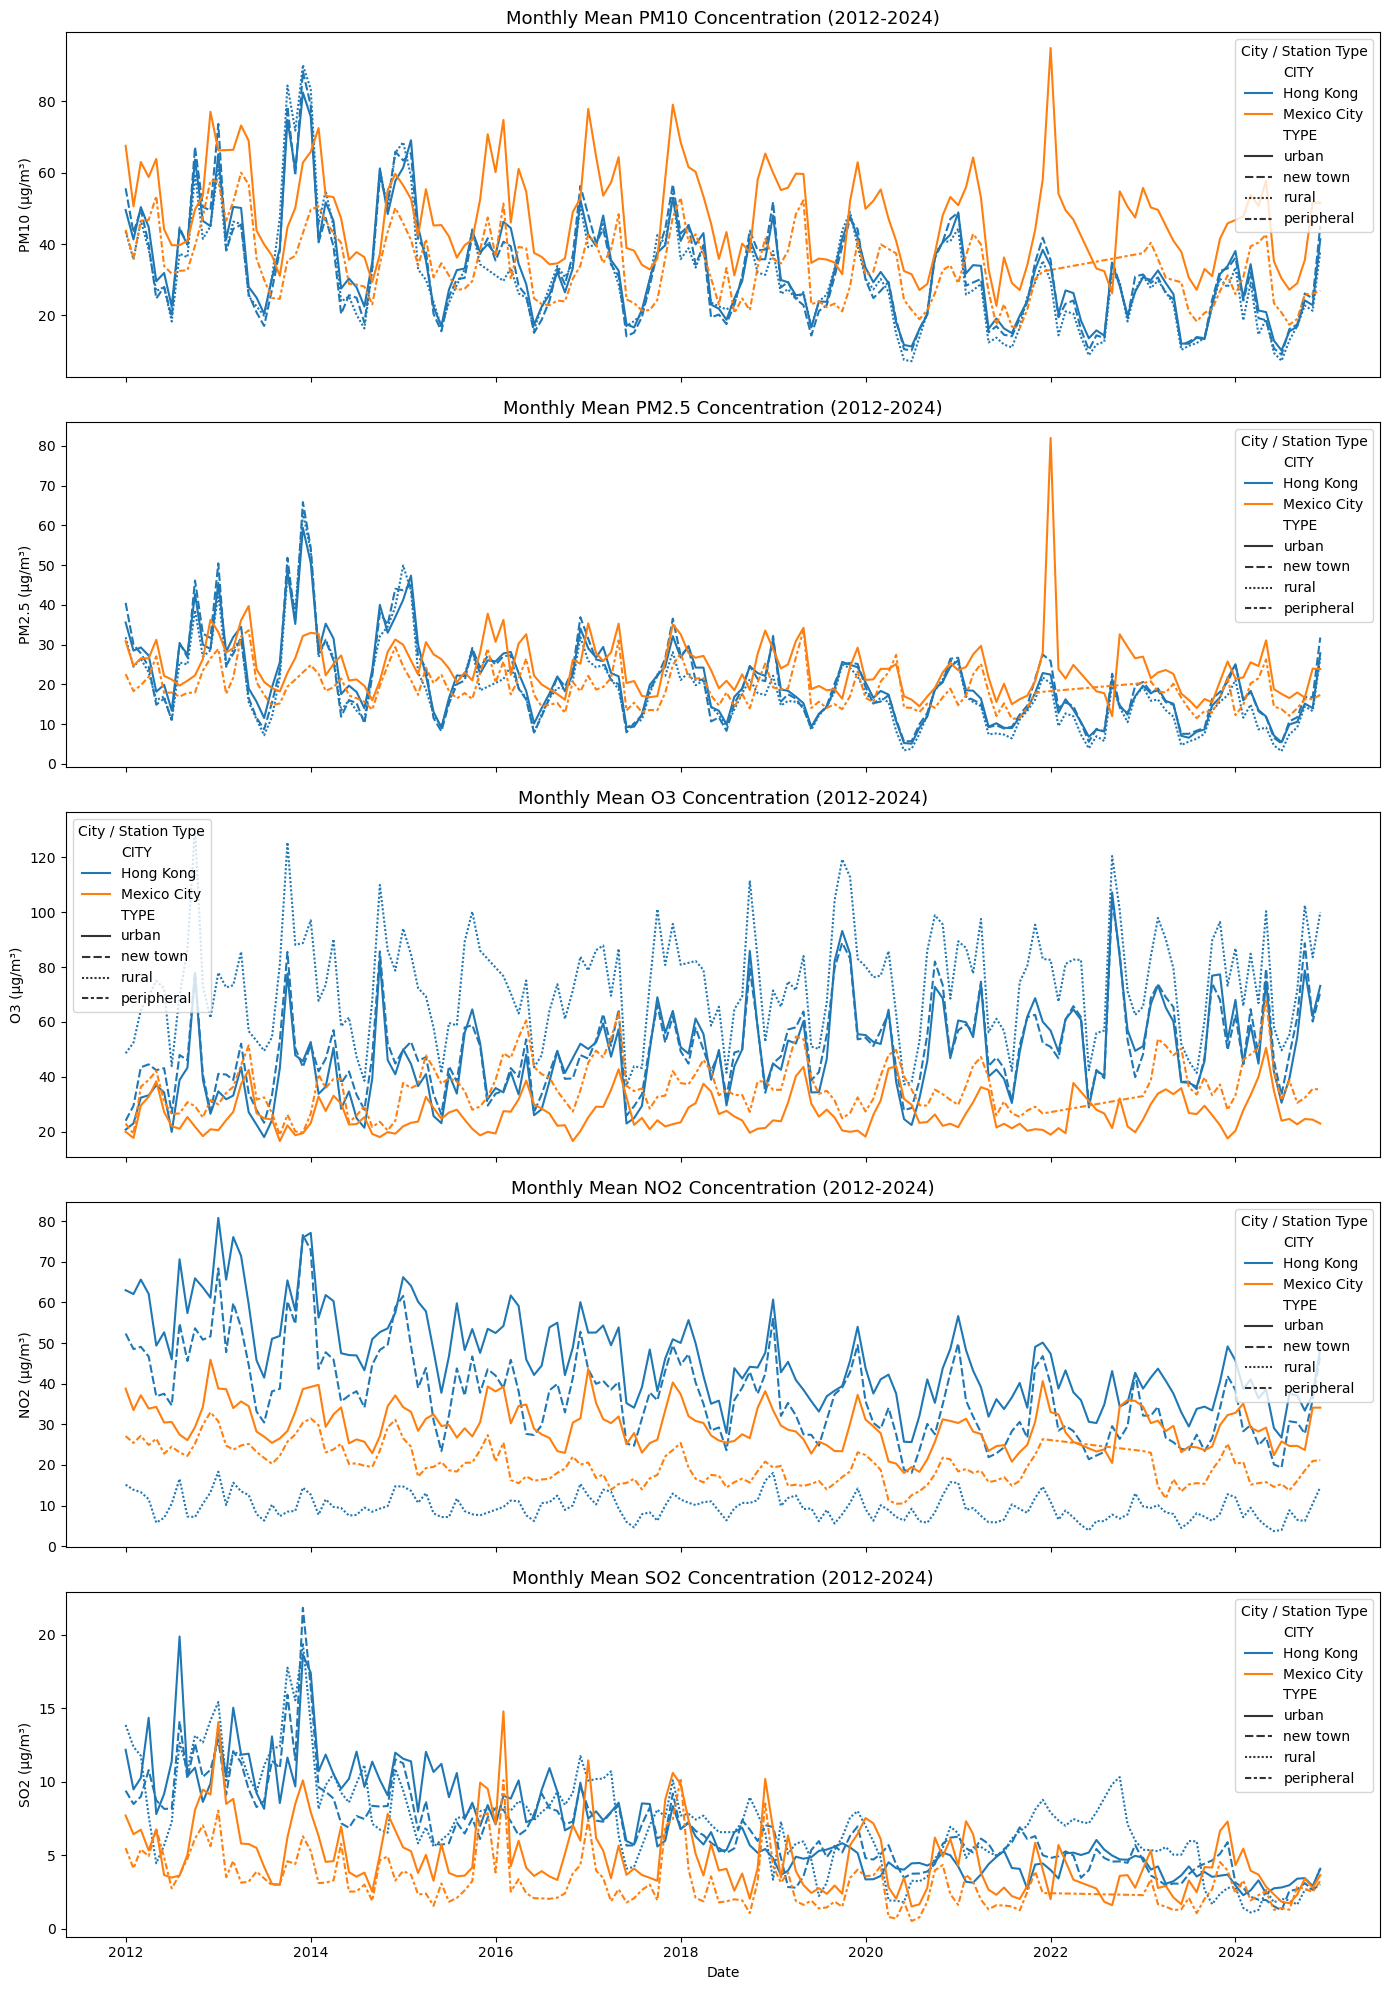

In [136]:
# --- Helper: Add 'CITY' and 'TYPE' columns to both DataFrames ---
# Define station types for HK
hk_station_type = {
    'CENTRAL/WESTERN': 'urban',
    'EASTERN': 'urban',
    'KWUN TONG': 'urban',
    'SHAM SHUI PO': 'urban',
    'SHATIN': 'new town',
    'TAI PO': 'new town',
    'TAP MUN': 'rural',
    'TSUEN WAN': 'urban',
    'TUNG CHUNG': 'new town',
    'YUEN LONG': 'new town'
}
df_hk['CITY'] = 'Hong Kong'
df_hk['TYPE'] = df_hk['STATION'].map(hk_station_type)

# Define station types for CDMX
mx_station_type = {
    'AJUSCO MEDIO': 'peripheral',
    'CAMARONES': 'urban',
    'HOSPITAL GENERAL DE MEXICO': 'urban',
    'MERCED': 'urban',
    'MIGUEL HIDALGO': 'urban',
    'PEDREGAL': 'peripheral',
    'SAN AGUSTIN': 'urban',
    'TLALNEPANTLA': 'urban',
    'UAM IZTAPALAPA': 'urban',
    'XALOSTOC': 'urban'
}
df_mc_all['CITY'] = 'Mexico City'
df_mc_all['TYPE'] = df_mc_all['STATION'].map(mx_station_type)

# --- Unir ambos DataFrames para análisis conjunto ---
df_all = pd.concat([df_hk, df_mc_all], ignore_index=True)

# --- Asegurarse de que DATE es datetime ---
df_all['DATE'] = pd.to_datetime(df_all['DATE'], errors='coerce')

# --- Crear columna de mes para agrupación mensual ---
df_all['MONTH'] = df_all['DATE'].dt.to_period('M')
# Convertir a timestamp para graficar correctamente
df_all['MONTH_START'] = df_all['MONTH'].dt.to_timestamp()

# --- Lista de contaminantes ---
pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
fig, axes = plt.subplots(len(pollutants), 1, figsize=(14, 20), sharex=True)
for i, pol in enumerate(pollutants):
    sns.lineplot(
        data=df_all,
        x='MONTH_START', y=pol,
        hue='CITY', style='TYPE',
        estimator='mean', ci=None,
        ax=axes[i]
    )
    axes[i].set_title(f'Monthly Mean {pol} Concentration (2012-2024)', fontsize=13)
    axes[i].set_ylabel(f'{pol} (µg/m³)')
    axes[i].set_xlabel('Date')
    axes[i].legend(title='City / Station Type')
plt.tight_layout()
plt.show()

1. PM10 (Top plot):

- Mexico City (orange) shows consistently higher PM10 concentrations than Hong Kong (blue) throughout the period.
- Both cities display clear seasonal peaks, but the peaks in Mexico City are more pronounced, especially in urban stations.
- Urban and new town and even rural stations in Hong Kong have similar trends, while urban stations in Mexico City tend to have the highest peaks.
2. PM2.5 (Second plot):

- Overall, PM2.5 levels are also higher in Mexico City than in Hong Kong, with similar seasonal patterns as PM10.
- Urban stations in Mexico City show the highest values and most variability.
- Hong Kong stations (urban, new town, rural) have lower and more stable PM2.5 concentrations, especially in more recent years.
3. O3 (Third plot):

- Ozone concentrations are generally higher in Hong Kong, especially in the rural station, with frequent and strong peaks.
- Mexico City shows lower O3 values in urban stations as expected while values from the peripheral ones are higher.
- While Hong Kong's "urban" and "new town" stations are quite similar, the difference between station types (peripheral vs. urban) is most evident in Mexico City.
4. NO2 (Fourth plot):

- Hong Kong has higher NO2 concentrations than Mexico City, particularly in urban and new town stations.
- There is a clear decreasing trend in NO2 for HK, possibly reflecting emission control policies.
- Rural station in Hong Kong have the lowest NO2 levels.
5. SO2 (Bottom plot):

- SO2 concentrations are low in both cities, with Hong Kong showing slightly higher values, especially before 2014.
- Both cities show a decreasing trend in SO2, with very low values in recent years.
**General observations:**

- Mexico City generally has higher particulate matter (PM10, PM2.5) and ozone, while Hong Kong has higher NO2 and SO2.
- Urban stations in Mexico City tend to experience the highest PM peaks, and rural stations in Hong Kong show the highest O3 peaks.
- Both cities show decreasing trends in SO2, likely due to air quality regulations.
- Seasonal patterns are visible for most pollutants, especially in Mexico City.

### 2. Distribution and outliers of contaminants (KDEs and Boxplots)

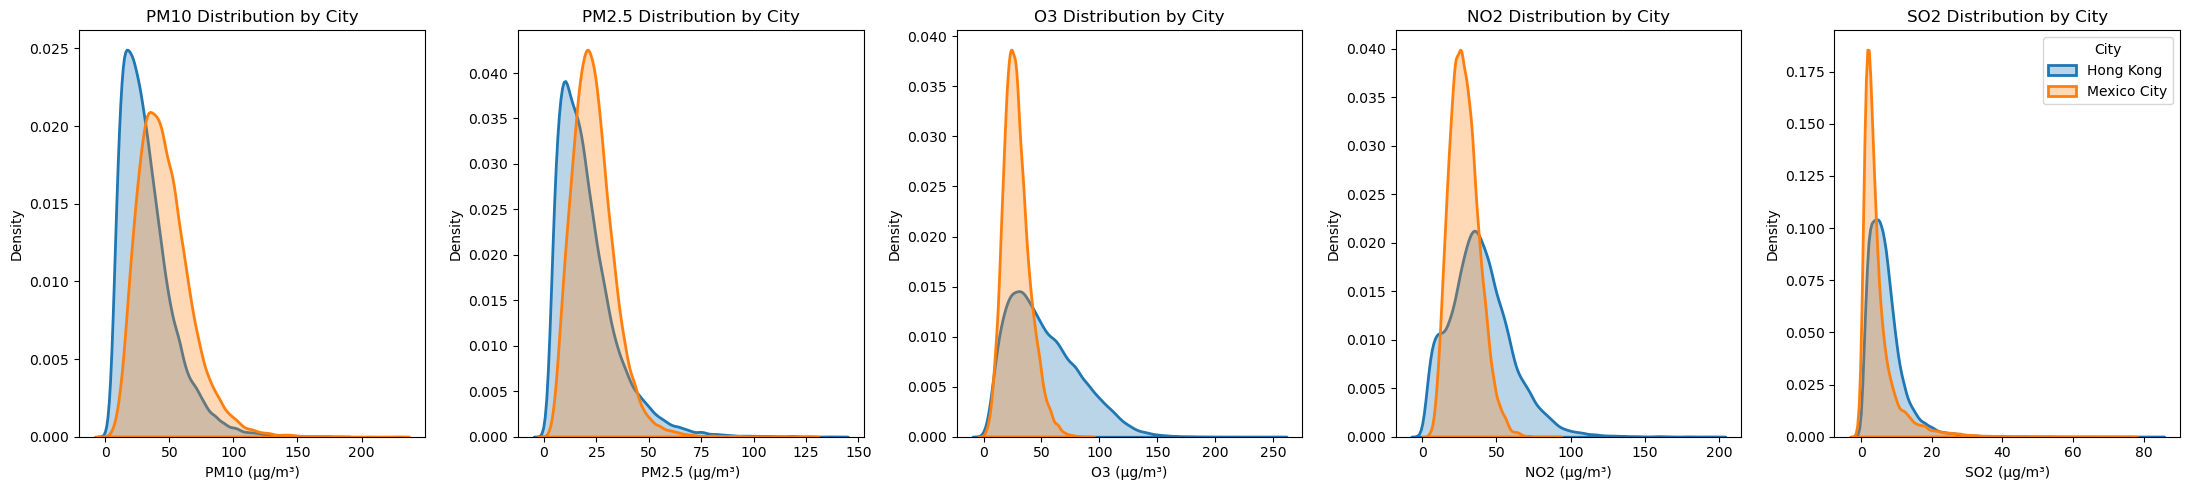

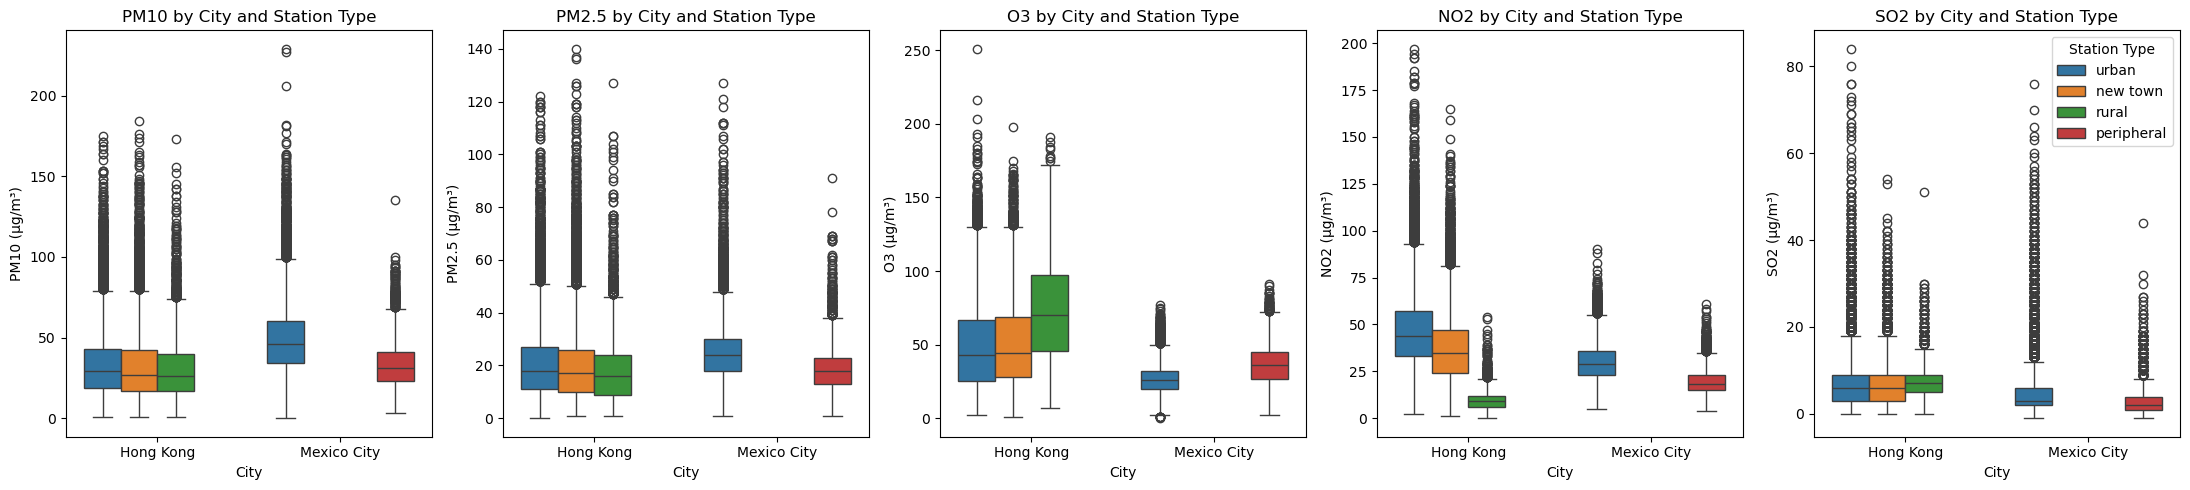

Maximum values by city and station:
           CITY                     STATION  PM10  PM2.5   O3  NO2  SO2
0     Hong Kong             CENTRAL/WESTERN   164    120  251  162   54
1     Hong Kong                     EASTERN   160     91  203  162   46
2     Hong Kong                   KWUN TONG   175    122  166  197   65
3     Hong Kong                SHAM SHUI PO   152    116  177  185   84
4     Hong Kong                      SHATIN   146    118  165  149   45
5     Hong Kong                      TAI PO   151    112  165  125   36
6     Hong Kong                     TAP MUN   173    127  191   54   51
7     Hong Kong                   TSUEN WAN   171    111  180  192   66
8     Hong Kong                  TUNG CHUNG   162    126  175  165   54
9     Hong Kong                   YUEN LONG   184    140  198  159   53
10  Mexico City                AJUSCO MEDIO    95     68   91   58   27
11  Mexico City                   CAMARONES   141    102   65   83   56
12  Mexico City  HOSPITAL GE

In [147]:
import matplotlib.patches as mpatches

# --- Lista de contaminantes ---
pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
city_palette = {'Hong Kong': '#1f77b4', 'Mexico City': '#ff7f0e'}

# KDEs: leyenda solo en el último subplot
fig, axes = plt.subplots(1, len(pollutants), figsize=(22, 5), sharey=False)
for i, pol in enumerate(pollutants):
    for city, color in city_palette.items():
        sns.kdeplot(
            data=df_all[(df_all[pol].notna()) & (df_all['CITY'] == city)],
            x=pol,
            fill=True,
            alpha=0.3,
            linewidth=2,
            color=color,
            ax=axes[i],
            label=city
        )
    axes[i].set_title(f'{pol} Distribution by City')
    axes[i].set_xlabel(f'{pol} (µg/m³)')
    axes[i].set_ylabel('Density')
    # Quita la leyenda de todos menos el último
    if i != len(pollutants) - 1:
        if axes[i].legend_ is not None:
            axes[i].legend_.remove()
    else:
        axes[i].legend(title='City', loc='upper right')

plt.tight_layout()
plt.show()

# Boxplots: leyenda solo en el último subplot
fig, axes = plt.subplots(1, len(pollutants), figsize=(22, 5), sharey=False)
for i, pol in enumerate(pollutants):
    sns.boxplot(
        data=df_all[df_all[pol].notna()],
        x='CITY',
        y=pol,
        hue='TYPE',
        ax=axes[i]
    )
    axes[i].set_title(f'{pol} by City and Station Type')
    axes[i].set_xlabel('City')
    axes[i].set_ylabel(f'{pol} (µg/m³)')
    # Quita la leyenda de todos menos el último
    if i != len(pollutants) - 1:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(title='Station Type', loc='upper right')

plt.tight_layout()
plt.show()

# Tabla resumen de valores máximos por contaminante, ciudad y estación
summary = df_all.groupby(['CITY', 'STATION'])[pollutants].max().reset_index()
print("Maximum values by city and station:")
print(summary)

**KDEs (Kernel Density Estimates)**
- PM10 & PM2.5: The orange curves (Mexico City) are consistently shifted to the right compared to the blue curves (Hong Kong), indicating that both PM10 and PM2.5 concentrations are generally a bit higher in Mexico City. The distributions are right-skewed in both cities, but Mexico City shows a broader spread and higher density at elevated concentrations.
- O3 (Ozone): Hong Kong (blue) displays a wider and higher distribution of ozone values, with a longer tail towards high concentrations. Mexico City (orange) has a narrower distribution, with most values at lower concentrations. This suggests that ozone episodes are more frequent and intense in Hong Kong.
- NO2: Hong Kong again shows higher NO2 concentrations overall, with the blue curve peaking at higher values than the orange. Mexico City’s NO2 distribution is more concentrated at lower values.
- SO2: Both cities have low SO2 concentrations, but Mexico City’s distribution is even more concentrated at very low values. Hong Kong shows a slightly broader distribution, but both cities have relatively low SO2 overall.

**Boxplots (by City and Station Type)**
- PM10 & PM2.5: The median and interquartile range (IQR) for Mexico City are higher than for Hong Kong, confirming the KDE results. There are numerous outliers, especially in Mexico City, indicating occasional extreme pollution events. Urban stations in Mexico City tend to have the highest medians and more variability.
- O3: Hong Kong’s rural and new town stations show higher medians and more spread, while Mexico City’s values are lower and less variable. Outliers are present in both cities, but more pronounced in Hong Kong.
- NO2: Hong Kong’s urban and new town stations have higher medians and IQRs than Mexico City. Outliers are present in both cities, but Hong Kong’s distribution is more spread out.
- SO2: Both cities have low medians and IQRs for SO2, with some outliers.
> **Note on Outliers:**
Many outliers are visible in the boxplots. These may correspond to specific pollution episodes or measurement anomalies. Further investigation of those dates and stations is recommended for context.

**Summary Table (Maximum Values by City and Station)**
- PM10 & PM2.5: The highest PM10 value is observed in Mexico City (XALOSTOC, 229 µg/m³), but several Hong Kong stations also reach high maxima (e.g., YUEN LONG, 184 µg/m³). For PM2.5, Hong Kong’s KWUN TONG (122) and Mexico City’s MIGUEL HIDALGO (127) are among the highest.
- O3: Curious how Hong Kong's urban stations show much higher maximum ozone values (up to 251 µg/m³ in CENTRAL/WESTERN) compared to Mexico City (max 91 µg/m³ in AJUSCO MEDIO and PEDREGAL, which correspond to the peripheral stations).
- NO2: Hong Kong’s KWUN TONG (197) and TSUEN WAN (192) have the highest NO2 maxima, while Mexico City’s highest is 90 (MIGUEL HIDALGO).
- SO2: Both cities have moderate SO2 maxima, with Hong Kong’s SHAM SHUI PO (84) and Mexico City’s XALOSTOC (76) being the highest.
**General Insights:**

- Mexico City overall experiences a bit higher particulate matter (PM10, PM2.5) concentrations.
- Hong Kong tends to have higher O3 and NO2 concentrations, especially in rural and new town stations.
- SO2 levels are low in both cities, reflecting effective emission controls.
- Outliers in the boxplots highlight the importance of investigating specific episodes for both cities.

### 3. Spatial analysis: urban vs. rural/peripheral/new town comparison

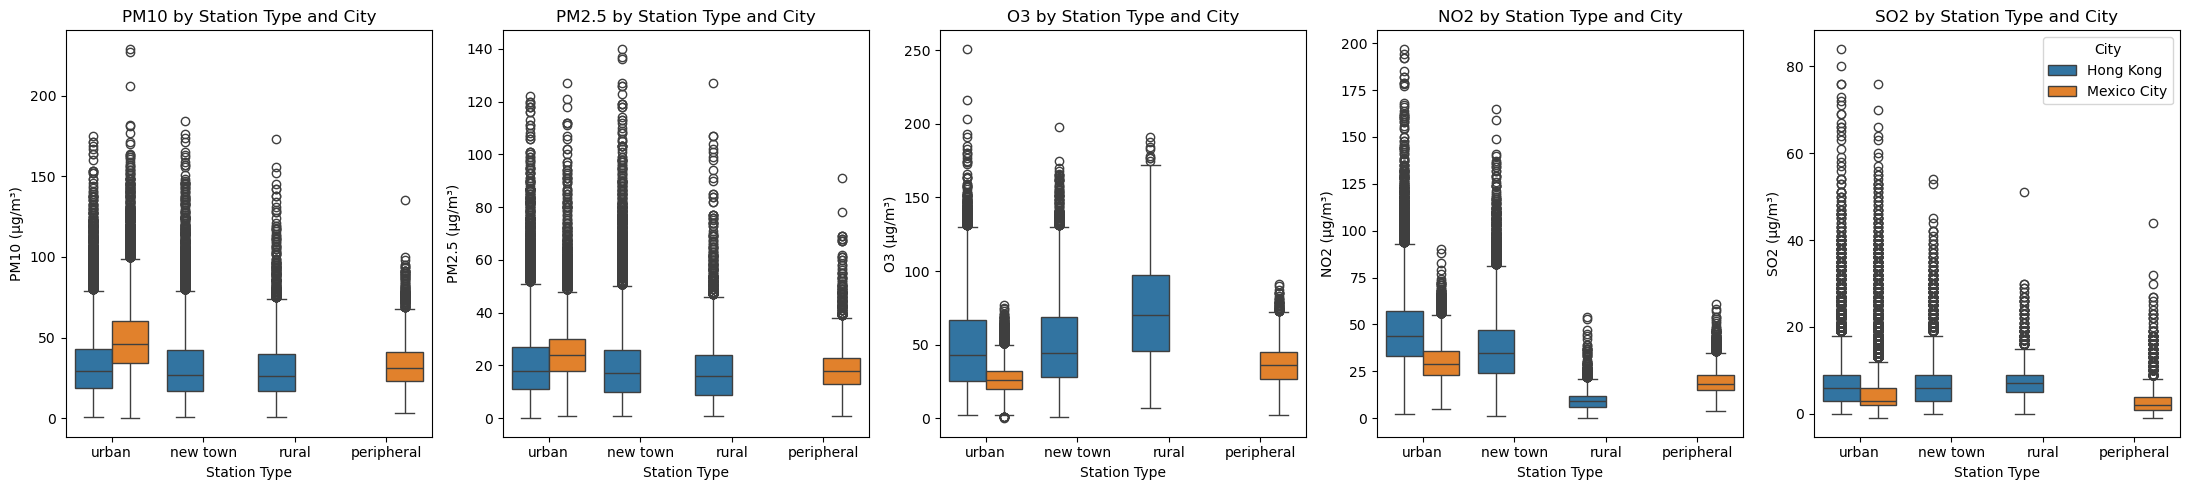

Mean pollutant concentrations by city and station type:
                        PM10  PM2.5    O3   NO2  SO2
CITY        TYPE                                    
Hong Kong   new town   32.38  20.44 50.33 37.18 6.63
            rural      31.10  18.52 73.93  9.62 7.22
            urban      33.14  20.68 48.07 46.62 6.98
Mexico City peripheral 33.13  18.86 36.70 19.55 3.13
            urban      48.97  24.69 26.62 30.24 5.22


In [ ]:
# We'll use boxplots to compare pollutant concentrations by station type within each city.
# This helps visualize spatial differences in air quality.

pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
station_types = ['urban', 'new town', 'rural', 'peripheral']  # Not all types exist in both cities

fig, axes = plt.subplots(1, len(pollutants), figsize=(22, 5), sharey=False)
for i, pol in enumerate(pollutants):
    sns.boxplot(
        data=df_all[df_all[pol].notna()],
        x='TYPE',
        y=pol,
        hue='CITY',
        order=station_types,
        ax=axes[i]
    )
    axes[i].set_title(f'{pol} by Station Type and City')
    axes[i].set_xlabel('Station Type')
    axes[i].set_ylabel(f'{pol} (µg/m³)')
    # Only show legend in the last subplot
    if i != len(pollutants) - 1:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(title='City', loc='upper right')

plt.tight_layout()
plt.show()

# Calculate and display mean values by city and station type for each pollutant
summary_spatial = df_all.groupby(['CITY', 'TYPE'])[pollutants].mean().round(2)
print("Mean pollutant concentrations by city and station type:")
print(summary_spatial)

**PM10 & PM2.5:**
- Urban stations in Mexico City have the highest mean concentrations of both PM10 (49 µg/m³) and PM2.5 (25 µg/m³), noticeably higher than any station type in Hong Kong.
- In Hong Kong, PM10 and PM2.5 levels are similar across urban, new town, and rural stations (all around 18–21 µg/m³ for PM2.5 and 31–33 µg/m³ for PM10), indicating less spatial variation.
- Peripheral stations in Mexico City have lower PM levels than urban stations but are still comparable to Hong Kong.

**O3 (Ozone):**
- Rural stations in Hong Kong have the highest mean ozone concentration (74 µg/m³), much higher than any other group.
- New town and urban stations in Hong Kong also have higher O3 than Mexico City' urban stations.
- In Mexico City, peripheral stations have higher O3 (37 µg/m³) than urban stations (27 µg/m³), but both are lower than Hong Kong.

**NO2:**
- Urban stations in Hong Kong have the highest mean NO2 (47 µg/m³), followed by new town (37 µg/m³).
- Rural Hong Kong stations have very low NO2 (10 µg/m³).
- In Mexico City, urban stations have higher NO2 (30 µg/m³) than peripheral (20 µg/m³), but both are lower than Hong Kong’s urban sites.

**SO2:**
- SO2 levels are low in all groups, but slightly higher in Hong Kong (6–7 µg/m³) than in Mexico City (3–5 µg/m³).
- The lowest SO2 is found in Mexico City’s peripheral stations (3 µg/m³).

**General Insights:**
- Urban areas in Mexico City experience the highest particulate pollution (PM10, PM2.5), while Hong Kong’s spatial differences are smaller for particulates.
- Ozone is much higher in Hong Kong, especially at rural stations, likely due to less NOx titration and regional transport.
- NO2 is highest in Hong Kong’s urban areas, reflecting dense traffic and urban emissions.
- SO2 is low everywhere, reflecting effective controls, but still slightly higher in Hong Kong.
- The boxplots show that spatial differences are more pronounced for O3 and NO2 in Hong Kong, and for PM in Mexico City.

> These results highlight the importance of local sources and atmospheric chemistry in shaping spatial air quality patterns. Urban Mexico City faces particulate challenges, while Hong Kong’s rural areas are more affected by ozone.

### 4. Correlations between pollutants (Heatmaps)

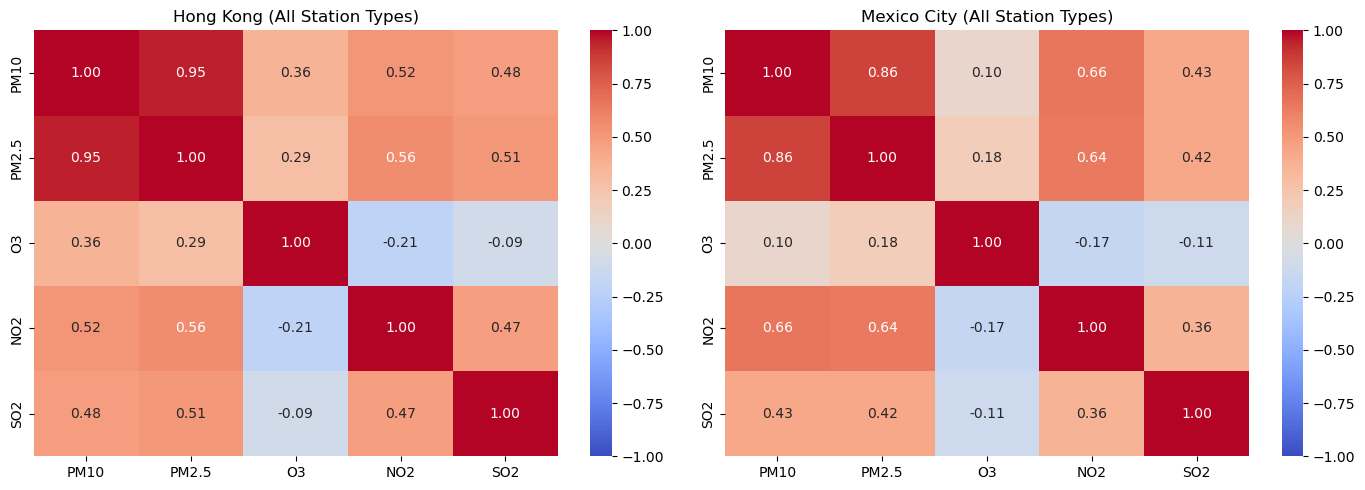

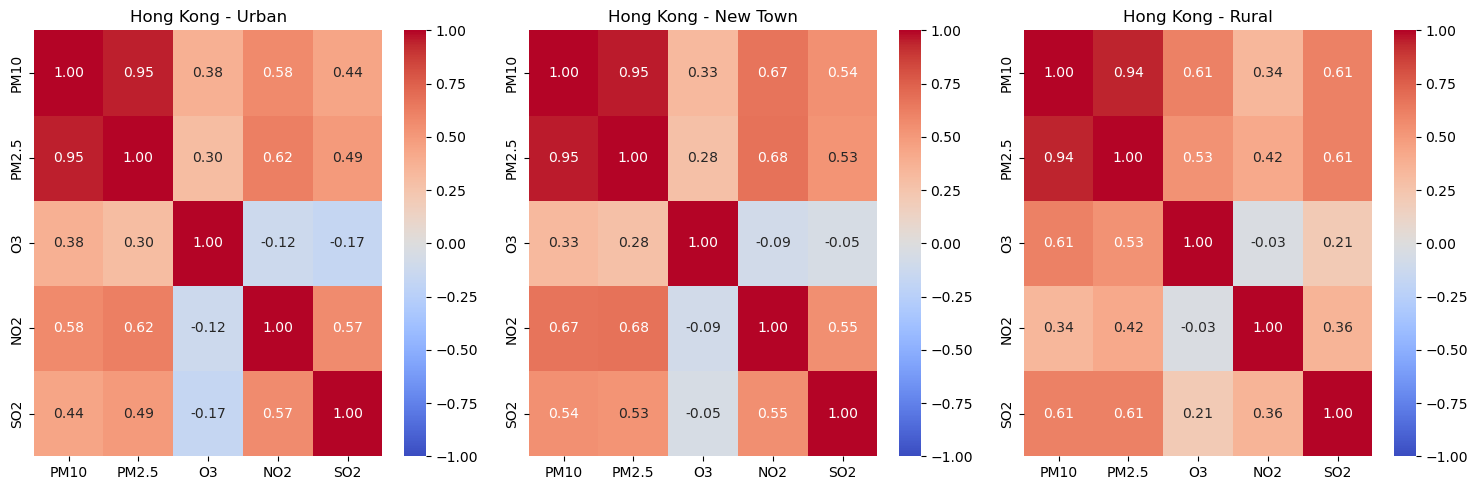

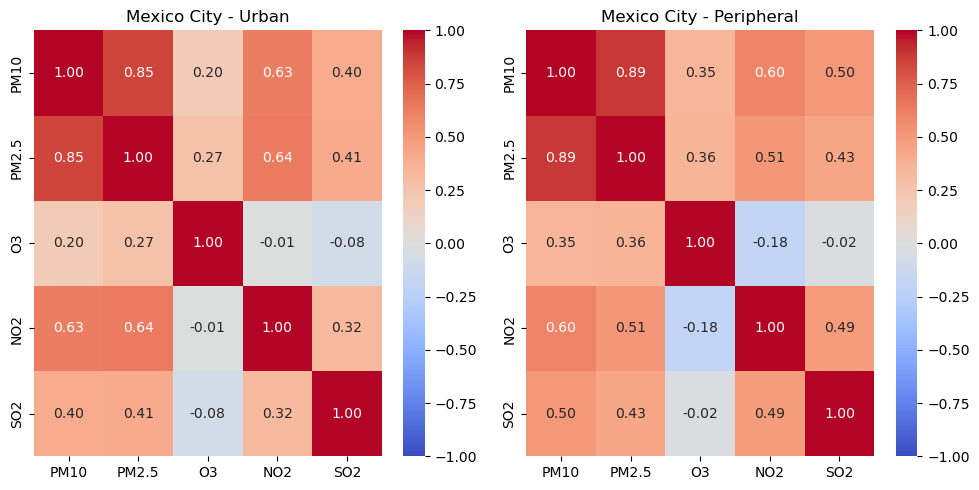

In [149]:
# We will compute the correlation matrix for each city and station type, and visualize it as a heatmap.
# This helps identify which pollutants tend to increase or decrease together.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']

# Function to plot heatmap for a given DataFrame, title, and axis
def plot_corr_heatmap(df, title, ax):
    corr = df[pollutants].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(title)

# Prepare subplots: one for each city
cities = df_all['CITY'].unique()
fig, axes = plt.subplots(1, len(cities), figsize=(14, 5))
if len(cities) == 1:
    axes = [axes]
for i, city in enumerate(cities):
    df_city = df_all[df_all['CITY'] == city]
    plot_corr_heatmap(df_city, f'{city} (All Station Types)', axes[i])
plt.tight_layout()
plt.show()

# Heatmaps by station type within each city
for city in cities:
    types = df_all[df_all['CITY'] == city]['TYPE'].dropna().unique()
    fig, axes = plt.subplots(1, len(types), figsize=(5*len(types), 5))
    if len(types) == 1:
        axes = [axes]
    for j, t in enumerate(types):
        df_sub = df_all[(df_all['CITY'] == city) & (df_all['TYPE'] == t)]
        plot_corr_heatmap(df_sub, f'{city} - {t.title()}', axes[j])
    plt.tight_layout()
    plt.show()

In [151]:
# Print correlation matrices for each city as tables

pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
cities = df_all['CITY'].unique()

for city in cities:
    print(f"\nCorrelation matrix for {city}:")
    df_city = df_all[df_all['CITY'] == city]
    corr_matrix = df_city[pollutants].corr().round(2)
    print(corr_matrix)

# Print correlation matrices by station type within each city

pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
cities = df_all['CITY'].unique()

for city in cities:
    types = df_all[df_all['CITY'] == city]['TYPE'].dropna().unique()
    for t in types:
        print(f"\nCorrelation matrix for {city} - {t.title()}:")
        df_sub = df_all[(df_all['CITY'] == city) & (df_all['TYPE'] == t)]
        corr_matrix = df_sub[pollutants].corr().round(2)
        print(corr_matrix)


Correlation matrix for Hong Kong:
       PM10  PM2.5    O3   NO2   SO2
PM10   1.00   0.95  0.36  0.52  0.48
PM2.5  0.95   1.00  0.29  0.56  0.51
O3     0.36   0.29  1.00 -0.21 -0.09
NO2    0.52   0.56 -0.21  1.00  0.47
SO2    0.48   0.51 -0.09  0.47  1.00

Correlation matrix for Mexico City:
       PM10  PM2.5    O3   NO2   SO2
PM10   1.00   0.86  0.10  0.66  0.43
PM2.5  0.86   1.00  0.18  0.64  0.42
O3     0.10   0.18  1.00 -0.17 -0.11
NO2    0.66   0.64 -0.17  1.00  0.36
SO2    0.43   0.42 -0.11  0.36  1.00

Correlation matrix for Hong Kong - Urban:
       PM10  PM2.5    O3   NO2   SO2
PM10   1.00   0.95  0.38  0.58  0.44
PM2.5  0.95   1.00  0.30  0.62  0.49
O3     0.38   0.30  1.00 -0.12 -0.17
NO2    0.58   0.62 -0.12  1.00  0.57
SO2    0.44   0.49 -0.17  0.57  1.00

Correlation matrix for Hong Kong - New Town:
       PM10  PM2.5    O3   NO2   SO2
PM10   1.00   0.95  0.33  0.67  0.54
PM2.5  0.95   1.00  0.28  0.68  0.53
O3     0.33   0.28  1.00 -0.09 -0.05
NO2    0.67   0.68 -0.09 

**General Patterns (All Stations):**
- In both Hong Kong and Mexico City, PM10 and PM2.5 are very strongly positively correlated (0.95 in HK, 0.86 in MX), meaning that when one increases, the other almost always does as well. This is expected, as both are particulate matter and often share sources.
- NO2 is moderately to strongly correlated with both PM10 and PM2.5 in both cities (0.52–0.67), suggesting that traffic and combustion sources contribute to both particulates and NO2.
- O3 (Ozone) shows weak or negative correlations with NO2 and particulates, especially in Hong Kong (e.g., O3 vs NO2: -0.21 in HK, -0.17 in MX). This reflects the complex photochemical relationship where high NO2 can actually reduce O3 locally due to titration.
- SO2 is moderately correlated with particulates and NO2 in both cities, but the relationships are weaker than for PM10/PM2.5.

**By Station Type:**

*Hong Kong:*

- All station types show a very strong PM10–PM2.5 correlation (0.94–0.95).
- Urban and new town stations have strong NO2–PM correlations (up to 0.68), while rural stations show a weaker NO2–PM relationship.
- In rural HK, O3 is more positively correlated with PM10 (0.61) and PM2.5 (0.53) than in urban areas, possibly reflecting regional transport or different atmospheric chemistry.
- O3 and NO2 are weakly or negatively correlated in all HK station types, with the strongest negative value in urban (-0.12).

*Mexico City:*

- Urban and peripheral stations both show strong PM10–PM2.5 correlations (0.85–0.89).
- NO2 is strongly correlated with PM10 and PM2.5 in both station types (0.51–0.64).
- O3 correlations with other pollutants are generally weak, but slightly more positive in peripheral stations (O3 vs PM10: 0.35).
- SO2 is moderately correlated with particulates and NO2, especially in peripheral stations (up to 0.50 with PM10).

**Insights:**
- The strongest relationships are always between PM10 and PM2.5, regardless of city or station type, which is expected since PM2.5 particles are included within PM10.
- NO2 and particulates are also closely linked, especially in urban environments, highlighting the role of combustion sources.
- O3 behaves differently: it is generally not correlated or is negatively correlated with primary pollutants, reflecting its secondary formation and the titration effect with NO2.
- SO2 shows moderate positive correlations with particulates and NO2, but these are weaker than the PM–PM or PM–NO2 links.

>These patterns suggest that particulate and NO2 pollution are often driven by similar sources (e.g., traffic, industry), while ozone dynamics are more complex and influenced by photochemistry and regional transport. The differences between urban, new town, and rural/peripheral stations highlight the impact of local sources and atmospheric processes.

### 5. Trends and seasonality by pollutant and season

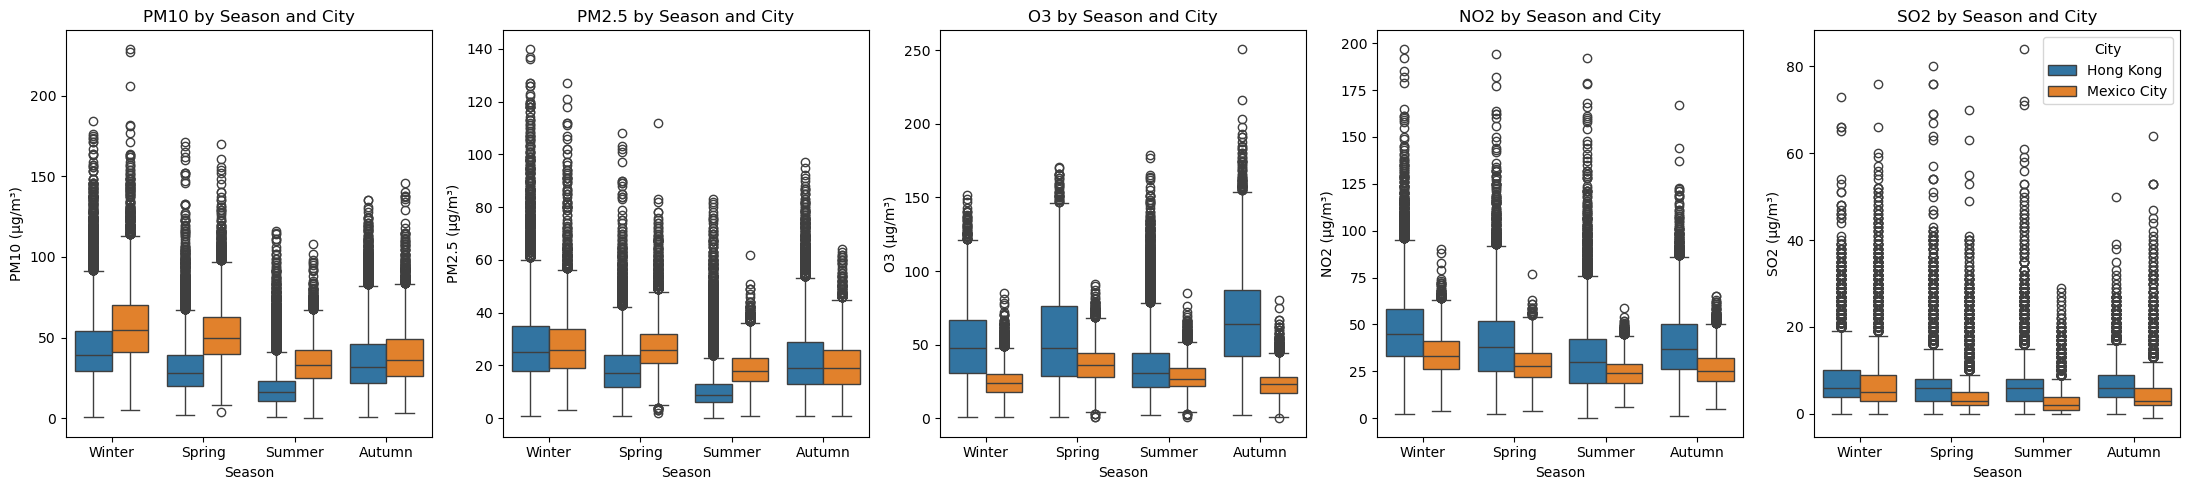

Mean pollutant concentrations by city and season:
                    PM10  PM2.5    O3   NO2  SO2
CITY        SEASON                              
Hong Kong   Autumn 36.18  22.36 65.99 38.91 6.67
            Spring 31.51  19.25 53.78 39.36 6.62
            Summer 19.35  11.56 36.27 32.06 6.58
            Winter 43.79  28.51 50.14 46.71 7.59
Mexico City Autumn 38.83  20.24 23.45 26.31 4.70
            Spring 52.71  26.99 36.68 28.47 4.43
            Summer 34.54  19.02 28.03 24.26 3.16
            Winter 57.43  27.83 24.78 34.03 7.06


In [152]:
# Define seasons for each date (Northern Hemisphere)
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_all['SEASON'] = df_all['DATE'].apply(get_season)

pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

fig, axes = plt.subplots(1, len(pollutants), figsize=(22, 5), sharey=False)
for i, pol in enumerate(pollutants):
    sns.boxplot(
        data=df_all[df_all[pol].notna()],
        x='SEASON',
        y=pol,
        hue='CITY',
        order=seasons,
        ax=axes[i]
    )
    axes[i].set_title(f'{pol} by Season and City')
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel(f'{pol} (µg/m³)')
    if i != len(pollutants) - 1:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(title='City', loc='upper right')

plt.tight_layout()
plt.show()

# Optional: Print mean values by city and season for each pollutant
summary_season = df_all.groupby(['CITY', 'SEASON'])[pollutants].mean().round(2)
print("Mean pollutant concentrations by city and season:")
print(summary_season)

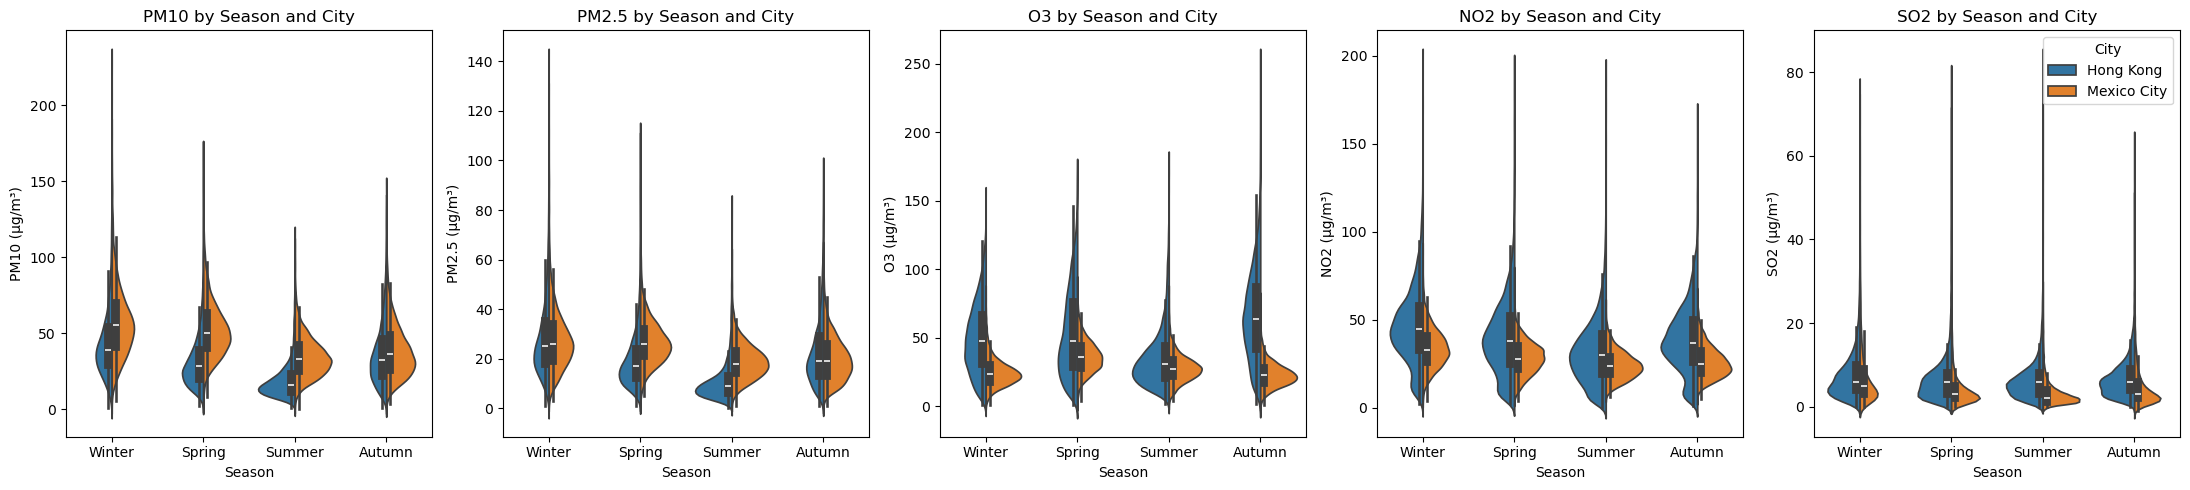

In [156]:
# --- Violin plots by season and city ---

pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2']
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

fig, axes = plt.subplots(1, len(pollutants), figsize=(22, 5), sharey=False)
for i, pol in enumerate(pollutants):
    sns.violinplot(
        data=df_all[df_all[pol].notna()],
        x='SEASON',
        y=pol,
        hue='CITY',
        order=seasons,
        split=True,
        ax=axes[i]
    )
    axes[i].set_title(f'{pol} by Season and City')
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel(f'{pol} (µg/m³)')
    if i != len(pollutants) - 1:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(title='City', loc='upper right')

plt.tight_layout()
plt.show()

**PM10 & PM2.5 (Particulate Matter):**
- Mexico City shows the highest mean PM10 and PM2.5 concentrations in winter and spring (PM10: 57.4 in winter, 52.7 in spring; PM2.5: 27.8 in winter, 27.0 in spring). Autumn and summer have lower values.
- Hong Kong also has its highest PM10 and PM2.5 in winter (PM10: 43.8, PM2.5: 28.5), with a clear drop in summer (PM10: 19.4, PM2.5: 11.6).
- Both cities show a strong seasonal pattern: particulate pollution peaks in winter and spring, likely due to meteorological conditions (e.g., temperature inversions, less rainfall, more stagnant air) and possibly increased emissions (e.g., heating, festivals).
- The boxplots and violin plots show that Mexico City has a broader spread and more high outliers, especially in winter and spring, indicating more frequent extreme pollution episodes.

**O3 (Ozone):**
- Hong Kong has much higher mean ozone concentrations than Mexico City in all seasons, especially in autumn (66) and spring (54).
- Ozone in Hong Kong peaks in autumn, while in Mexico City it peaks in spring (36.7) and summer (28.0).
- The seasonal pattern reflects the influence of sunlight and temperature on ozone formation: higher O3 in warmer, sunnier months.
- The plots show a wider distribution for Hong Kong, with more high outliers, especially in autumn.

**NO2:**
- Hong Kong has higher mean NO2 than Mexico City in all seasons, with a winter peak (46.7) and a summer minimum (32.1).
- Mexico City also peaks in winter (34.0) and is lowest in summer (24.3).
- This pattern suggests that NO2, a traffic-related pollutant, accumulates more in winter due to less atmospheric dispersion.

**SO2:**
- Hong Kong has slightly higher SO2 than Mexico City in all seasons, with a small winter peak (7.6).
- Mexico City shows a winter peak (7.1) but otherwise low values (3–5).
- SO2 levels are low overall, reflecting effective emission controls.

**General Insights:**
- Winter and spring are the most polluted seasons for particulates and NO2 in both cities, likely due to meteorological factors and increased emissions.
- Ozone peaks in autumn and spring in Hong Kong, and in spring/summer in Mexico City, reflecting photochemical production.
- Mexico City experiences higher and more variable PM pollution, with more extreme events, while Hong Kong has higher ozone and NO2.
- The boxplots and violin plots both show these seasonal patterns, with the violin plots highlighting the full distribution and the presence of outliers.

>These results highlight the importance of seasonality in air quality management. Winter and spring require special attention for PM and NO2, while ozone control is most critical in the warmer, sunnier months.